# Assignment 2

In [1]:
#According to coding standards, all imported stuffs will be stored here.
import os
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Downloading the data from the web using curl and storing it in a user defined file name and type with the > sign
#Use ! because we are running local bashrc/terminal commands 
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > NYCh2o.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     01006    0     0   6970      0 --:--:-- --:--:-- --:--:--  6986


In [3]:
# This is supposed to be proving that environmental variable PUIDATA exists and that it points to the PUIdata directory
# But for some reasons my original bashrc didn't work despite the correct commands
# So I am defining a new PUIdata instead
os.environ["PUIDATA"] = "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("Path to PUIDATA", os.getenv("PUIDATA"))

('Path to PUIDATA', '/nfshome/qg412/001_PUI/PUIDATA')


In [4]:
#Moving my downloaded csv data into PUIDATA folder.
!mv NYCh2o.csv $PUIDATA

In [5]:
#Verifying if the csv was indeed moved into the correct folder
!ls $PUIDATA

NYCh2o.csv


In [6]:
# Defining sqf17 as pandas reading the data and reading the first 7 lines of data
# Understanding the data
h2o = pd.read_csv("%s/NYCh2o.csv"%os.getenv("PUIDATA"))
h2o.head(7)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


In [7]:
#Although not required, let's display some bottom rows of data too
h2o.tail(3)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
36,2015,8516502.0,1009.0,118
37,2016,8537673.0,1002.0,117
38,2017,8622698.0,990.2,115


In [8]:
#Get the system to tell you all the headers of the data 
h2o.columns

Index([u'Year', u'New York City Population',
       u'NYC Consumption(Million gallons per day)',
       u'Per Capita(Gallons per person per day)'],
      dtype='object')

In [9]:
#Total number of rows & columns in data
h2o.size

156

In [10]:
#Narrowing it down to the two interesting factors/columns that I want to plot
h2o_2c = h2o[['New York City Population','NYC Consumption(Million gallons per day)']]
h2o_2c.head()

,New York City Population,NYC Consumption(Million gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0


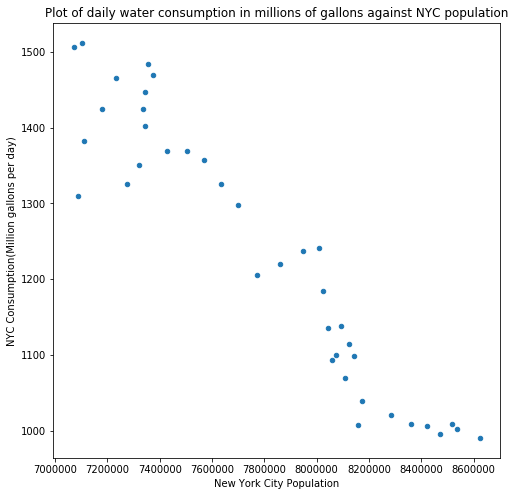

In [11]:
h2o_2c.plot(x="New York City Population", 
            y="NYC Consumption(Million gallons per day)", 
            kind='scatter', 
            figsize=(8,8), 
            title="Plot of daily water consumption in millions of gallons against NYC population")

Figure 1: Gallons of water consumed daily in New York City against New York City Population as compiled by Department of Environmental Protection between 1979 and 2017. The two variables displayed an interesting negative correlation, that water consumption decreases as population increases, which is counter intuitive.

   # Extra Credit Assignment

In [12]:
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [13]:
# Asking pandas to read the json file and display it
water = pd.read_json(url)
water

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986
8,7342476.0,1447.0,197,1987
9,7353719.0,1484.0,202,1988


In [14]:
#ordering the year in chronological order
water_df= water.sort_values(by=["year"])
water_df.head(20)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986
8,7342476.0,1447.0,197,1987
9,7353719.0,1484.0,202,1988


In [15]:
# Displaying the names of all variables that I have
water_df.columns

Index([u'new_york_city_population', u'nyc_consumption_million_gallons_per_day',
       u'per_capita_gallons_per_person_per_day', u'year'],
      dtype='object')

In [16]:
# Choosing a time and a numeric variable
water_df = water[['year', 'per_capita_gallons_per_person_per_day']]

In [17]:
#renaming just because I am anal and likes things without _
water_df.rename(columns = {'year':'Year',
                'per_capita_gallons_per_person_per_day':'Per capita daily'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


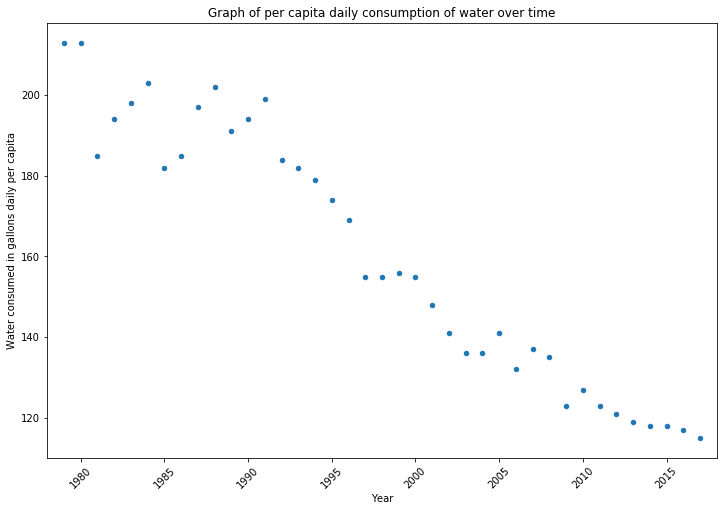

In [20]:
#Plotting
ax  = water_df.plot(x='Year', 
                   y='Per capita daily', 
                   figsize=(12,8),
                   title="Graph of per capita daily consumption of water over time",
                   kind='scatter',
                   rot=45) ;
plt.xlim(1978,2018)

#naming the axis and title
ax.set_ylabel("Water consumed in gallons daily per capita");


Figure 2: Graph of daily water consumption per capita from 1979 to 2017, compiled by Department of Environmental Protection. The two variables displayed a similar interesting negative correlation previously observed, that water consumption decreases as population increases, which is counter intuitive.

# Question for Tutor: 

Why is it that despite me ordering the year in chronological order above, the plot is still not able to render the graph correctly when it is a line graph? Logically speaking it should. Thanks!!!